# Distributions

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn.apionly as sns


//anaconda/envs/py3l/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
//anaconda/envs/py3l/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


### Random Variables

A **random variable** is a mapping from a sample space to the set of real numbers. It assigns a real number to each outcome in the sample space.

For example, consider the event of a coin toss that we have seen before. There are two outcomes in the sample space, a heads and a tails. We can ask the question, whats the probability of a heads or a tails? For an unbiased coin, these are, by symmetry, 1/2 each. The random variable here is the number of heads, and its probability is P(0)=1/2, and P(1)=1/2.

Another random variable is the number of heads in two coin tosses. There, as we have seen before, P(0)=1/4, P(1)=1/2, P(2)=1/4.

Random variables provide the link from events and sample spaces to data, and it is their **probability distribution** that we are interested in.

A random variable is called **discrete** if it has a countable number of values. The technical definition of countable is that there is a 1-1 correspondence with the integers 1,2,3... . The number of heads in 2 coin tosses is a discrete random variable.

#### Bernoulli Random Variables

The **Bernoulli Distribution** represents the distribution for coin flips. Let the random variable X represent such a coin flip, where X=1 is heads, and X=0 is tails. Let us further say that the probability of heads is p (p=0.5 is a fair coin). 

We then say:

$$X \sim Bernoulli(p),$$

which is to be read as **X has distribution Bernoulli(p)**. The **probability distribution function (pdf)** or **probability mass function** associated with the Bernoulli distribution is

\begin{eqnarray}
P(X = 1) &=& p \\
P(X = 0) &=& 1 - p 
\end{eqnarray}

for p in the range 0 to 1. 
The **pdf**, or the probability that random variable $X=x$ may thus be written as 

$$P(X=x) = p^x(1-p)^{1-x}$$

for x in the set {0,1}.

The **mean**, or **expected value** of this distribution can be calculated analogously to the mean value of data by noting that $X=1$ happens with frequency $p*N$ and thus it is p. 

Let us engage in some term defining right now, since we will use these terms throught the book. $X$ is a random variable, and when we say $X=x$ we are asking "*what if the random variable X takes the value x*. 

$P(X=x)$ asks: what is the probability that the random variable X takes the value x. 

Finally $p$ is a parameter of the Bernoulli distribution, and as we have seen, one of the things we want to do in data analysis is: having seen some data, what can we infer to be the values of p, so that we can make future predictions for X.

In [2]:
from scipy.stats import bernoulli
#bernoulli random variable
brv=bernoulli(p=0.3)
brv.rvs(size=20)

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

#### The Predictwise distribution revisited

Let is go back for a bit to the Predictiwise election predictions from chapter REF. There, on OCt 8 2012, we took a set of probabilities, one per state that Predictwise gave us on October 12th to make a prediction of the "empirical" distribution of votes that Obama would get, come election day.

We reproduce the code here below:

In [4]:
predictwise = pd.read_csv('data/predictwise.csv').set_index('States')
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)
result = simulate_election(predictwise, 10000)
np.sum(result >= 269) #run multiple times to see result change

9950

Let us parse the intent of the above code a bit. We run 10,000 simulations. In each one of these simulations, we toss 51 different biased coins, and assign the vote to obama is the output of `np.random.uniform` is less than the probablity of an obama win. 

The first thing to pick up on here is that `np.random.uniform` gives you a random number between 0 and 1, uniformly. In other words, the number is equally likely to be between 0 and 0.1, 0.1 and 0.2, and so on. This is a very intuitive idea, but it is formalized by the notion of the **Uniform Distribution**.

We then say:

$$X \sim Uniform([0,1),$$

which is to be read as **X has distribution Uniform([0,1])**. The **probability distribution function (pdf)** associated with the Uniform distribution is

\begin{eqnarray}
P(X = x) &=& 1 \, for \, x \in [0,1] \\
P(X = x) &=& 0 \, for \, x \notin [0,1]
\end{eqnarray}

We use this trick of sampling from a Uniform distribution ti sumulate multiple draws from each of the 51 bernoulli distribitions we have, one for each state.

Now for any Obama probability less than 1.0, there are simulations in which Obama wont win that state, and this will induce fluctuations and a distribution on the total number of electoral college votes that Obama gets (when we sum over all states). And this is what we see in the histogram below. 

//anaconda/envs/py3l/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


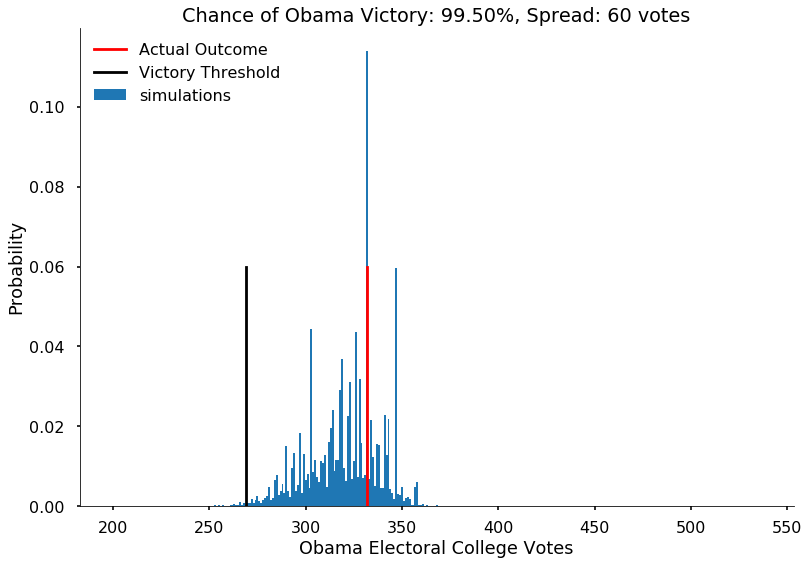

In [5]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()
with sns.plotting_context('poster'):
    plot_simulation(result)

This is an empirical **Probability Mass Function** or **Probability Density Function**. The concept of Mass Function is used when the outcomes come from a discrete set, rather than a continuous set. The word **density** is strictly used when the random variable X takes on continuous values, as in the uniform distribution, rather than discrete values such as here, but we'll abuse the language and use the word probability distribution in both cases.

Lets summarize: the way the density arose here that we did ran 10,000 tosses (for each state), and depending on the value, assigned the state to Obama or Romney, and then summed up the electoral votes over the states.

There is a second, very useful question, we can ask of any such probability density: what is the probability that a random variable is less than some value. In other words: $P(X < x)$. This is *also* a probability distribution and is called the **Cumulative Distribution Function**, or CDF (sometimes just called the **distribution**, as opposed to the **density**). Its obtained by "summing" the probability density function for all $X$ less than $x$.

In [6]:
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print("Obama Win CDF at votes=", votes, " is ", CDF(votes))

Obama Win CDF at votes= 200  is  0.0
Obama Win CDF at votes= 300  is  0.1475
Obama Win CDF at votes= 320  is  0.4412
Obama Win CDF at votes= 340  is  0.8377
Obama Win CDF at votes= 360  is  0.9983
Obama Win CDF at votes= 400  is  1.0
Obama Win CDF at votes= 500  is  1.0


Text(0, 0.5, 'probability of Obama win')

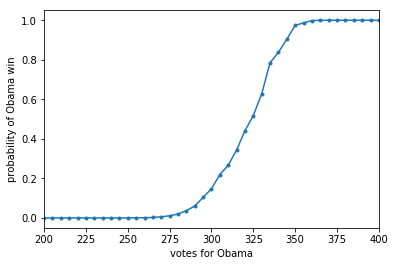

In [7]:
votelist=np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-');
plt.xlim([200,400])
plt.xlabel("votes for Obama")
plt.ylabel("probability of Obama win")

### Expectations and Variance

The **expectation value** of a quantity with respect to the a distribution is the weighted sum of the quantity where the weights are probabilties from the distribution. For example, for the random variable $X$:

$$E_p[X] = \sum_x x\,p(x).$$

$E_p[X]$ if often just called the expectation value of the distribution. This definition is analogous to the one for the arithmetic mean of a dataset: the only difference is that we want to give more weight to more probable values.

The variance of a distribution is defined analogous to that of a dataset:

$$V_p[X] = E_p[(X-E_p[X])^2]$$.

For the Bernoulli distribution $p(x)=p=constant$, and you are summing it over ones as opposed to 0's, so the mean is just p. The variance is $(1-p)^2\times p +(-p)^2\times (1-p) = p(1-p)(1-p+p) = p(1-p)$.

In general, we can find this mean that by obtaining a large bunch of samples from the distribution and find their arithmetic mean. The justification for this is the Law of Large Numbers, which you can read up on. However the intuition is obvious: for a large number of samples, the frequencies will tract probabilities well, so high probability samples with roughly the same value will re-occur, and a simple arithmetic sun will capture the curves of the distribution.

### The Law of Large Numbers

Lets keep increasing the length of the sequence of coin flips n, and compute a running average $S_n$ of the coin-flip random variables,
$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i .$$
We plot this running mean, and notice that it converges to the mean of the distribution from which the random variables are plucked, ie the Bernoulli distribution with p=0.5. 

In [8]:
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [9]:
random_flips = throw_a_coin(10000)
running_means = np.zeros(10000)
sequence_lengths = np.arange(1,10001,1)
for i in sequence_lengths:
    running_means[i-1] = np.mean(random_flips[:i])

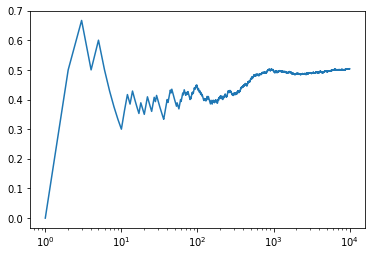

In [10]:
plt.plot(sequence_lengths, running_means);
plt.xscale('log')


This is an example of a very important theorem in statistics, the law of large numbers, which says this:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables. Suppose that $X$ has the finite mean $\mu$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to the mean of the variables $\mu$ as $n \to \infty$:**

$$ S_n \to \mu \, as \, n \to \infty. $$

Having now established something about long sequences of random variables, lets turn to samples from the population of random numbers.

### Samples from a population of coin flips

Lets redo the experiment with coin flips that we started earlier.

We'll establish some terminology at first. What we'll do different here is to do a large set of **replications** M, in each of which we did many coin flips, or **observations** N.  We'll call **a single replication a sample of observations**. Thus the number of samples is M, and the sample size is N. 

These samples have been chosen from a population of size $n >> N$. If this reminds you of elections, thats intentional.

We'll now calculatethe mean over the observations in a sample, or sample mean, for a sample size of 10, with 20 replications. There are thus 20 means.

In [11]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:] = throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [12]:
make_throws(number_of_samples=20, sample_size=10)

array([0.5, 0.8, 0.5, 0.7, 0.6, 0.1, 0.3, 0.7, 0.4, 0.6, 0.7, 0.7, 0.5,
       0.4, 0.6, 0.8, 0.5, 0.4, 0.4, 0.4])

Let us now do 200 replications, each of which has a sample size of 1000 flips, and store the 200 means for each sample size from 1 to 1000 (in strides of 10) in `sample_means`. This will take a bit of time to run.

In [13]:
sample_sizes=np.arange(1,1001,10)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

Lets formalize what we are up to. Lets call the N random variables in the $m^{th}$ sample $x_{m1},x_{m2},...,x_{mN}$ and lets define the sample mean

$$\bar{x_m}(N) = \frac{1}{N}\, \sum_{i=1}^{N} x_{mi} $$

Now imagine the size of the sample becoming large, asymptoting to the size of an infinite or very large population (ie the sample becomes the population). Then you would expect the sample mean to approach the mean of the population distribution. This is just a restatement of the law of large numbers.

Of course, if you drew many different samples of a size N (which is not infinite), the sample means $\bar{x_1}$, $\bar{x_2}$, etc would all be a bit different from each other. But the law of large numbers intuitively indicates that as the sample size gets very large and becomes an infinite population size, these slightly differeing means would all come together and converge to the population (or distribution) mean.

To see this lets define, instead, the mean or expectation of the sample means over the set of samples or replications, at a sample size N:

$$E_{\{R\}}(\bar{x}) = \frac{1}{M} \,\sum_{m=1}^{M} \bar{x_m}(N) ,$$
where $\{R\}$ is the set of M replications, and calculate and plot this quantity.

In [14]:
mean_of_sample_means = [np.mean(means) for means in sample_means]
len(mean_of_sample_means)

100

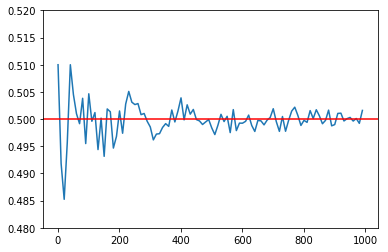

In [15]:
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);
plt.axhline(0.5, 0, 1, color="r")

Not surprisingly, the mean of the sample means converges to the distribution mean as the sample size N gets very large.


#### The notion of a Sampling Distribution

In data science, we are always interested in understanding the world from incomplete data, in other words from a sample or a few samples of a population at large. Our experience with the world tells us that even if we are able to repeat an experiment or process, we will get more or less different answers the next time. If all of the answers were very different each time, we would never be able to make any predictions.

But some kind of answers differ only a little, especially as we get to larger sample sizes. So the important question then becomes one of the distribution of these quantities from sample to sample, also known as a **sampling distribution**. 

Since, in the real world, we see only one sample, this distribution helps us do **inference**, or figure the uncertainty of the estimates of quantities we are interested in. If we can somehow cook up samples just somewhat different from the one we were given (this is the idea behind the bootstrap), we can calculate quantities of interest, such as the mean on each one of these samples. By seeing how these means vary from one sample to the other, we can say how typical the mean in the sample we were given is, and whats the uncertainty range of this quantity. This is why the mean of the sample means is an interesting quantity; it characterizes the **sampling distribution of the mean**, or the distribution of sample means.

We can see this mathematically by writing the mean or expectation value of the sample means thus:

$$E_{\{R\}}(N\,\bar{x}) = E_{\{R\}}(x_1 + x_2 + ... + x_N) = E_{\{R\}}(x_1) + E_{\{R\}}(x_2) + ... + E_{\{R\}}(x_N)$$

Now in the limit of a very large number of replications, each of the expectations in the right hand side can be replaced by the population mean using the law of large numbers! Thus:

\begin{eqnarray*}
E_{\{R\}}(N\,\bar{x}) &=& N\, \mu\\
E(\bar{x}) &=& \mu
\end{eqnarray*}

which tells us that in the limit of a large number of replications the expectation value of the sampling means converges to the population mean. This limit gives us the true sampling distribution, as opposed to what we might estimate from our finite set of replicates.

Lets make many replicates (M=1000, our infinity) instead to see what the "true" sampling distribution looks like as a function of sample size.(Caution: This takes a few minutes to run!]

In [16]:
sample_means_1000_replicates = [make_throws(number_of_samples=1000, sample_size=i) for i in sample_sizes]
mean_of_sample_means_1000 = [np.mean(means) for means in sample_means_1000_replicates]

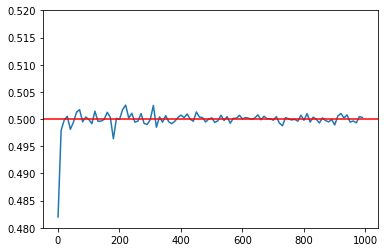

In [17]:
plt.plot(sample_sizes, mean_of_sample_means_1000);
plt.ylim([0.480,0.520]);
plt.axhline(0.5, 0, 1, color="r")

#### The sampling distribution as a function of sample size

We can see what the estimated sampling distribution of the mean looks like at different sample sizes.

In [18]:
len(sample_means)

100

Lets plot the distribution of the mean as a function of sample size.

In [19]:
sample_sizes[1], sample_sizes[40], sample_sizes[99]

(11, 401, 991)

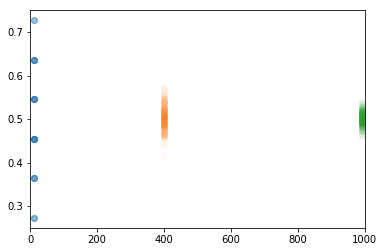

In [20]:
for i in [1, 40, 99]:
    plt.scatter([sample_sizes[i]]*200, sample_means[i], alpha=0.03);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

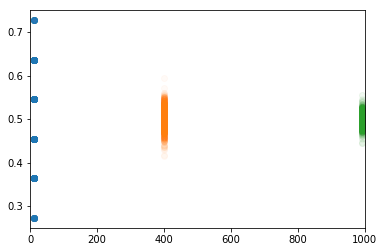

In [21]:
for i in [1, 40, 99]:
    plt.scatter([sample_sizes[i]]*1000, sample_means_1000_replicates[i], alpha=0.03);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

In [22]:
std_of_sample_means_1000 = [np.std(means) for means in sample_means_1000_replicates]

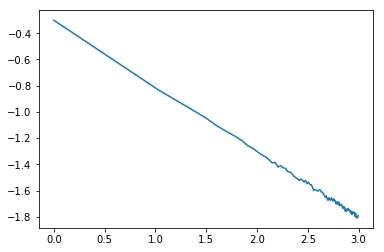

In [23]:
plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means_1000));

In [24]:
np.mean(np.diff(np.log10(std_of_sample_means_1000))/np.diff(np.log10(sample_sizes)))

-0.4782392362820865

Let us plot again the distribution of sample means at a large sample size, $N=1000$. What distribution is this?

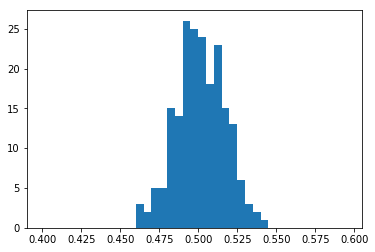

In [25]:
plt.hist(sample_means[99], bins=np.arange(0.4,0.6,0.005));

This is a **Gaussian** with sample standard deviation scaling as $1/\sqrt{N}$.

### The Gaussian Distribution

The sampling distribution of the mean itself has a mean $\mu$ and variance $s^2 = \frac{\sigma^2}{N}$. This distribution is called the **Gaussian** or **Normal Distribution**, and is probably the most important distribution in all of statistics.

The probability density of the normal distribution is given as:

$$ N(x, \mu, \sigma) = \frac{1}{s\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2s^2} } .$$

$s$ is called the **standard error**.

Lets step back and try and think about what this all means. As an example, say I have a weight-watchers' study of 1000 people, whose average weight is 150 lbs with standard deviation of 30lbs. If I was to randomly choose many samples of 100 people each, the mean weights of those samples would cluster around 150lbs with a standard error of 30/$\sqrt{100}$ = 3lbs. Now if i gave you a different sample of 100 people with an average weight of 170lbs, this weight would be more than 6 standard errors beyond the population mean, ^[this example is motivated by the crazy bus example in Charles Whelan's excellent Naked Statistics Book] and would thus be very unlikely to be from the weight watchers group.

The expected value of the Gaussian distribution is $E[X]=\mu$ and the variance is $Var[X]=s^2$.

Text(0.5, 0, '$x$')

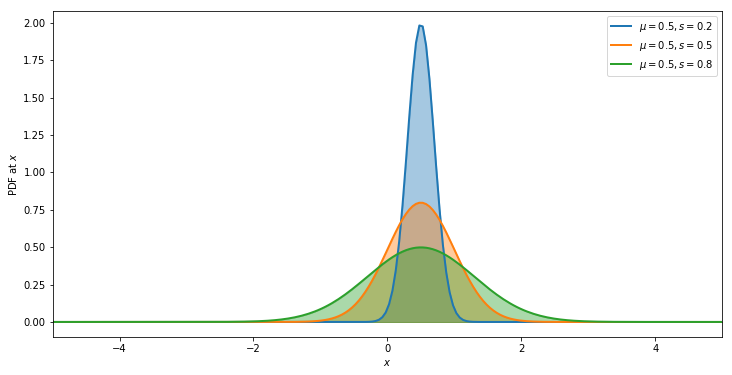

In [26]:
norm =  sp.stats.norm
x = np.linspace(-5,5, num=200)

colors = sns.color_palette()
fig = plt.figure(figsize=(12,6))
for mu, s, c in zip([0.5]*3, [0.2, 0.5, 0.8], colors):
    plt.plot(x, norm.pdf(x, mu, s), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, s={1:.1f}$".format(mu, s))
    plt.fill_between(x, norm.pdf(x, mu, s), color=c, alpha = .4)
    
    
plt.xlim([-5,5])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

### The Central Limit Theorem

The reason for the distribution's importance is the Central Limit Theorem(CLT). The theorem is stated as thus, very similar to the law of large numbers:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$. Suppose that $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

$$ S_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$

In other words:

$$s^2 = \frac{\sigma^2}{N}.$$


This is true, *regardless* of the shape of $X$, which could be binomial, poisson, or any other distribution.

Strictly speaking, under some conditions ^[REF :Lyapunov conditions], the variables $x_i$ dont have to be identically distributed, as long as $\mu$ is the mean of the means and $\sigma^2$ is the sum of the individual variances. This has major consequences, for the importance of this theorem.

Many random variables can be thought of as having come from the sum of a large number of small and independent effects. For example human height or weight can be thought of as the sum as a large number of genetic and environmental factors, which add to increase or decrease height or weight respectively. Or think of a measurement of a height. There are lots of ways things could go wrong: frayed tapes, stretched tapes, smudged marks, bad lining up of the eye, etc. These are all independent and have no systematic error in one direction or the other.

Then the sum of these factors, as long as there are a large number of them, will be distributed as a gaussian.

As a rule of thumb, the CLT starts holding at $N \sim 30$.


#### An application to elections: Binomial distribution in the large n, large k limit

For example, consider the binomial distribution Binomial(n,k, p) in the limit of large n. The number of successes k in n trials can be ragarded as the sum of n IID Bernoulli variables with values 1 or 0. Obviously this is applicable to a large sequence of coin tosses, or to the binomial sampling issue that we encountered earlier in the case of the polling. 

Using the CLT we can replace the binomial distribution at large n by a gaussian where k is now a continuous variable, and whose mean is the mean of the binomial $np$ and whose variance is $np(1-p)$, since

$$S_n \sim N(p, \frac{p(1-p)}{n}).$$

The accuracy of this approximation depends on the variance. A large variance makes for a broad distribution spanning many discrete k, thus justifying the transition from a discrete to a continuous distribution.

This approximation is used a lot in studying elections. For example, suppose I told you that I'd polled 1000 people in Ohio and found that 600 would vote Democratic, and 400 republican. Imagine that this 1000 is a "sample" drawn from the voting "population" of Ohio. Assume then that these are 1000 independent bernoulli trials with p=600/1000 = 0.6. Then we can say that, from the CLT, the mean of the sampling distribution of the mean of the bernoulli or equivalently the binomial is 0.6, with a variance of $0.6*0.4/1000 = 0.00024$. Thus the standard deviation is 0.015 for a mean of 0.6, or 1.5% on a mean of 60% voting Democratic.  This 1.5% if part of what pollsters quote as the margin of error of a candidates winning; they often include other factors such as errors in polling methodology.

If one has results from multiple pollsters, one can treat them as independent samples from the voting population. Then the average from these samples will approach the average in the population, with the sample means distributed normally around it.

#### What does this all mean?

The sample mean, or mean of the random variables $x_{mi}$ in the sample $m$, has a sampling distribution with mean $\mu$ and variance $\frac{\sigma^2}{N}$, as shown before. Now for large sample sizes we can go further and use the CLT theorem to say that this distribution is the normal distribution,

$$S_N \sim N(\mu, \frac{\sigma^2}{N})$$.

The preciseness of saying that we have a gaussian is a huge gain in our expository power. For example, for the case of the weight-watchers program above, a separation of 20lbs is more than 3 standard errors away, which corresponds to being way in the tail of a gaussian distribution. Because we can now quantify the area under the curve, we can say that 99.7\% of the sample means lie within 9lbs of 150. Thus you can way easily reject the possibility that the new sample is from the weight-watchers program with 99.7\% confidence. 

Indeed, the CLT allows us to take the reduction in variance we get from large samples, and make statements in different cases that are quite strong:

1. if we know a lot about the population, and randomly sampled 100 points from it, the sample mean would be with 99.7\% confidence within $0.3\sigma$ of the population mean. And thus, if $\sigma$ is small, the sample mean is quite representative of the population mean.
2. The reverse: if we have a well sampled 100 data points, we could make strong statements about the population as a whole. This is indeed how election polling and other sampling works. 
3. we can infer, as we just did, if a sample is consistent with a population
4. by the same token, you can compare two samples and infer if they are from the same population.